## Intro
1. What is a Parameter? 
2. Frequentist v.s. Bayesian
    * Frequentist point of view: parameter is fixed.
    * Bayesian point of view: parameter has a distribution. (our belief of the parameter value)
    * e.g. Heights of People, the fairness of a coin
3. In Bayesian state of mind, our belief of the parameter is "updated" by the samples we observed. 
4. Bayes Rule:
$$\Pr( \theta | X ) = \frac{\Pr(\theta \cap X)}{\Pr(X)} = \frac{\Pr(\theta)\Pr(X|\theta)}{\Pr(X)} \propto \Pr(\theta)\Pr(X|\theta) = prior \times likelihood$$

# a simple example: coin toss
$$X \sim Ber(\theta)$$

## prior believe
$$f_1(\theta) = 1, \theta \in [0,1]$$
$$f_2(\theta) = 2\theta, \theta \in [0,1]$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

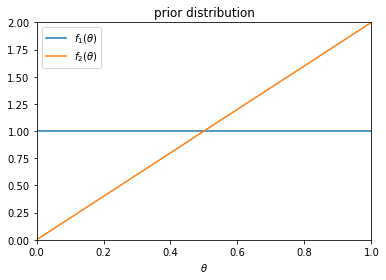

In [2]:
#plot prior distribution of theta
plt.plot([0,1],[1,1], label = r"$f_1(\theta)$")
plt.plot([0,1], [0,2], label = r'$f_2(\theta)$')
plt.title('prior distribution')
plt.xlim([0,1])
plt.ylim([0,2])
plt.xlabel(r'$\theta$')
plt.legend()

## update rule
$X = (x_1, x_2, \cdots, x_N), N $  i.i.d samples <br> 

Likelihood: $\Pr(X|\theta) = \theta^{n_1}(1-\theta)^{N - n_1}$

Update Rule: $$f(\theta | X) \propto f(\theta)P(X|\theta)$$

Posterior of $f_1$: 
$$f_1(\theta|X) \propto \theta^{n_1}(1-\theta)^{N - n_1} \sim Beta(n_1+1, N-n_1+1)$$

Posterior of $f_2$:
$$f_2(\theta|X) \propto 2\theta (\theta^{n_1}(1-\theta)^{N - n_1}) \propto \theta^{n_1+1}(1-\theta)^{N-n_1}\sim Beta(n_1+2, N-n_1+1)$$

In [3]:
from scipy.stats import beta

def plot_posterior(num_samples, num_positive_samples):
    a = [num_positive_samples+1, num_positive_samples+2]
    b = num_samples-num_positive_samples+1
    max_y = 0
    c = ['tab:blue', 'tab:orange']
    for i in range(2):
        rv = beta(a[i], b)
        x = np.linspace(beta.ppf(0.001, a[i], b),beta.ppf(0.999, a[i], b), 100)
        plt.plot(x, rv.pdf(x), lw=2, color = c[i], label=r'$f_%s(\theta|X)$'%(i+1))
        plt.axvline(x=num_positive_samples/num_samples, color='g', linestyle='--', label = 'MLE')
        plt.axvline(x = a[i]/(a[i]+b), color = c[i], linestyle = '--', label = r'Mean of  $f_%s(\theta|X)$'%(i+1))
        if np.max(rv.pdf(x)) > max_y: max_y = np.max(rv.pdf(x))

    plt.legend()
    plt.xlim([0,1])
    plt.ylim([0,max_y+0.5])
    plt.title(r'num of samples = %s, n1 = %s'%(num_samples, num_positive_samples))
    plt.show()

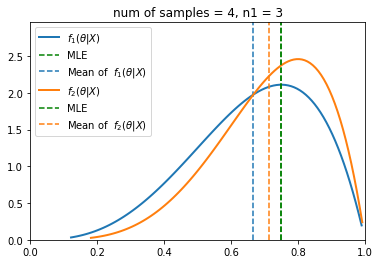

In [4]:
plot_posterior(4, 3)

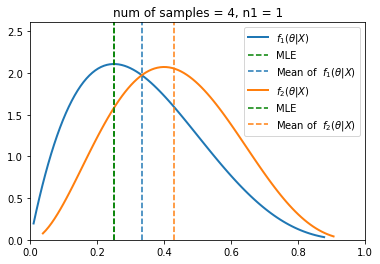

In [5]:
plot_posterior(4, 1)

In [ ]:
plot_posterior(100, 91)

## More Interesting Examples: 
https://github.com/CamDavidsonPilon/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers/blob/master/Chapter1_Introduction/Ch1_Introduction_TFP.ipynb